In [1]:
# Importing libraries
import os 
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
import mpl_toolkits

# Reading Input data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data Exploration

In [3]:
print('Shape of train data: ' , train_data.shape)
print('Shape of test  data: ' , test_data.shape)

('Shape of train data: ', (74111, 29))
('Shape of test  data: ', (25458, 28))


In [4]:
print('Features in train_data: ',train_data.columns)
print('Features in test_data : ', test_data.columns)

('Features in train_data: ', Index([u'id', u'log_price', u'property_type', u'room_type', u'amenities',
       u'accommodates', u'bathrooms', u'bed_type', u'cancellation_policy',
       u'cleaning_fee', u'city', u'description', u'first_review',
       u'host_has_profile_pic', u'host_identity_verified',
       u'host_response_rate', u'host_since', u'instant_bookable',
       u'last_review', u'latitude', u'longitude', u'name', u'neighbourhood',
       u'number_of_reviews', u'review_scores_rating', u'thumbnail_url',
       u'zipcode', u'bedrooms', u'beds'],
      dtype='object'))
('Features in test_data : ', Index([u'id', u'property_type', u'room_type', u'amenities', u'accommodates',
       u'bathrooms', u'bed_type', u'cancellation_policy', u'cleaning_fee',
       u'city', u'description', u'first_review', u'host_has_profile_pic',
       u'host_identity_verified', u'host_response_rate', u'host_since',
       u'instant_bookable', u'last_review', u'latitude', u'longitude', u'name',
       u'n

In [5]:
# Removing the ID fields 
train_id = train_data['id']
test_id = test_data['id']

train_data=train_data.drop(['id'], axis = 1)
test_data = test_data.drop(['id'], axis = 1)

In [76]:
# Summarizing numeric features
train_data.describe()

log_price  accommodates     bathrooms      latitude     longitude  \
count  74111.000000  74111.000000  73911.000000  74111.000000  74111.000000   
mean       4.782069      3.155146      1.235263     38.445958    -92.397525   
std        0.717394      2.153589      0.582044      3.080167     21.705322   
min        0.000000      1.000000      0.000000     33.338905   -122.511500   
25%        4.317488      2.000000      1.000000     34.127908   -118.342374   
50%        4.709530      2.000000      1.000000     40.662138    -76.996965   
75%        5.220356      4.000000      1.000000     40.746096    -73.954660   
max        7.600402     16.000000      8.000000     42.390437    -70.985047   

       number_of_reviews  review_scores_rating      bedrooms          beds  
count       74111.000000          57389.000000  74020.000000  73980.000000  
mean           20.900568             94.067365      1.265793      1.710868  
std            37.828641              7.836556      0.852143      1.254142  
min             0.000000             20.000000      0.000000      0.000000  
25%             1.000000             92.000000      1.000000      1.000000  
50%             6.000000             96.000000      1.000000      1.000000  
75%            23.000000            100.000000      1.000000      2.000000  
max           605.000000            100.000000     10.000000     18.000000

In [77]:
# Summarizing Categorical features
train_data.describe(include=['O'])

property_type        room_type amenities  bed_type cancellation_policy  \
count          74111            74111     74111     74111               74111   
unique            35                3     67122         5                   5   
top        Apartment  Entire home/apt        {}  Real Bed              strict   
freq           49003            41310       586     72028               32374   

         city                                        description first_review  \
count   74111                                              74111        58247   
unique      6                                              73479         2554   
top       NYC  Hello, I've been running guest house for Korea...   2017-01-01   
freq    32349                                                  8          293   

       host_has_profile_pic host_identity_verified host_response_rate  \
count                 73923                  73923              55812   
unique                    2                      2                 80   
top                       t                      t               100%   
freq                  73697                  49748              43254   

        host_since instant_bookable last_review  \
count        73923            74111       58284   
unique        3087                2        1371   
top     2015-03-30                f  2017-04-30   
freq           246            54660        1344   

                                          name neighbourhood  \
count                                    74111         67239   
unique                                   73359           619   
top     Bunk bed in the Treat Street Clubhouse  Williamsburg   
freq                                         8          2862   

                                            thumbnail_url  zipcode  
count                                               65895    73145  
unique                                              65883      769  
top     https://a0.muscache.com/im/pictures/70087089/b...  11211.0  
freq                                                    3     1368

In [78]:
train_data.head(3)

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   

   bed_type cancellation_policy  cleaning_fee city  ...    latitude  \
0  Real Bed              strict          True  NYC  ...   40.696524   
1  Real Bed              strict          True  NYC  ...   40.766115   
2  Real Bed            moderate          True  NYC  ...   40.808110   

   longitude                                      name     neighbourhood  \
0 -73.991617            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1 -73.989040  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2 -73.943756                          The Garden Oasis            Harlem   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   

                                       thumbnail_url zipcode  bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027       1.0   3.0  

[3 rows x 28 columns]

# EDA(Exploratory Data Analysis)

In [79]:
#Correlation Matrix
correlations = train_data.corr()
correlations

log_price  accommodates  bathrooms  cleaning_fee  \
log_price              1.000000      0.567574   0.355420      0.111191   
accommodates           0.567574      1.000000   0.505632      0.182306   
bathrooms              0.355420      0.505632   1.000000      0.053784   
cleaning_fee           0.111191      0.182306   0.053784      1.000000   
latitude              -0.002193     -0.078309  -0.137959     -0.060913   
longitude             -0.047529     -0.085160  -0.135026     -0.068505   
number_of_reviews     -0.032470      0.041964  -0.041381      0.110204   
review_scores_rating   0.091219     -0.017128   0.010537      0.034879   
bedrooms               0.473212      0.709258   0.589935      0.105454   
beds                   0.442153      0.810801   0.525591      0.131632   

                      latitude  longitude  number_of_reviews  \
log_price            -0.002193  -0.047529          -0.032470   
accommodates         -0.078309  -0.085160           0.041964   
bathrooms            -0.137959  -0.135026          -0.041381   
cleaning_fee         -0.060913  -0.068505           0.110204   
latitude              1.000000   0.896065          -0.017642   
longitude             0.896065   1.000000          -0.050009   
number_of_reviews    -0.017642  -0.050009           1.000000   
review_scores_rating -0.032858  -0.048801           0.011708   
bedrooms             -0.059162  -0.076113          -0.035149   
beds                 -0.080294  -0.082150           0.031109   

                      review_scores_rating  bedrooms      beds  
log_price                         0.091219  0.473212  0.442153  
accommodates                     -0.017128  0.709258  0.810801  
bathrooms                         0.010537  0.589935  0.525591  
cleaning_fee                      0.034879  0.105454  0.131632  
latitude                         -0.032858 -0.059162 -0.080294  
longitude                        -0.048801 -0.076113 -0.082150  
number_of_reviews                 0.011708 -0.035149  0.031109  
review_scores_rating              1.000000  0.011143 -0.027330  
bedrooms                          0.011143  1.000000  0.709416  
beds                             -0.027330  0.709416  1.000000

In [80]:
# From correlation matrix, it's evident that lattitude, longitude, number_of_reviews and review_scores_rating has very 
# less variation with log_price

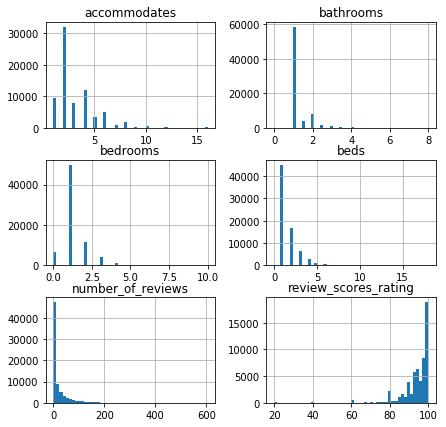

In [81]:
#Checking the numeric feature distribution
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'host_since',
                   'review_scores_rating']
train_data[numeric_features].hist(bins=50, figsize=(7,7))
plt.savefig("Attribute_histogram_plots")
plt.show()

<function seaborn.utils.despine>

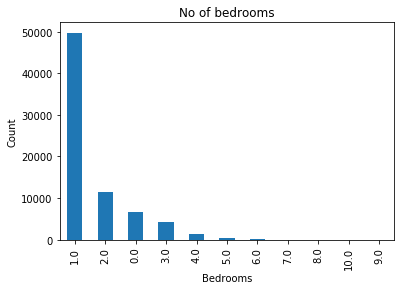

In [82]:
# Checking the most common house bedroom wise
train_data.bedrooms.value_counts().plot(kind='bar')
plt.title('No of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

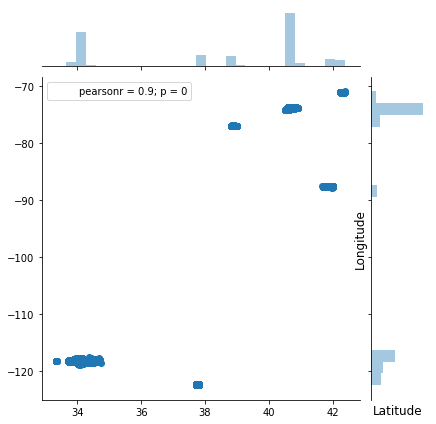

<function seaborn.utils.despine>

In [83]:
# Visualizing location of the house based on GPS location(Longitude and Latitude)
plt.figure(figsize=(10,10))
sns.jointplot(x=train_data.latitude.values, y=train_data.longitude.values)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [84]:
# Rooms are not grouped together in a perticular place; they are scattered in different different location around the globe

In [86]:
train_data.neighbourhood.value_counts()

Williamsburg                2862
Bedford-Stuyvesant          2166
Bushwick                    1601
Upper West Side             1396
Mid-Wilshire                1392
Harlem                      1374
Hollywood                   1321
Hell's Kitchen              1299
Venice                      1222
Upper East Side             1206
Crown Heights               1076
Astoria                      898
Lower East Side              833
East Village                 814
East Harlem                  793
Mission District             784
West Hollywood               729
Chelsea                      726
Greenpoint                   725
Washington Heights           722
Hamilton Heights             628
Alphabet City                619
Clinton Hill                 618
West Village                 606
Park Slope                   601
Long Beach                   573
Santa Monica                 566
Flatbush                     551
Downtown                     547
Capitol Hill                 526
          

In [87]:
# Picking the 30 most frequent neighbourhoods 
neighbourhood = ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Upper West Side', 
                 'Mid-Wilshire','Harlem','Hollywood','Hell''s Kitchen','Venice','Upper East Side','Crown Heights','Astoria',
                 'Lower East Side','East Village','East Harlem','Mission District', 'West Hollywood','Chelsea', 
                 'Greenpoint','Washington Heights','Hamilton Heights','Alphabet City','Clinton Hill','West Village',
                 'Park Slope','Long Beach','Santa Monica','Flatbush','Downtown','Capitol Hill']

other_neigh = list(set(train_data.neighbourhood.values) - set(neighbourhood))

In [88]:
len(other_neigh)

591

In [89]:
train_data.neighbourhood = pd.DataFrame(train_data.neighbourhood.replace(other_neigh, 'Others'))
test_data.neighbourhood = pd.DataFrame(test_data.neighbourhood.replace(other_neigh, 'Others'))

In [90]:
test_data.neighbourhood.value_counts()

Others                   15793
Williamsburg              1008
Bedford-Stuyvesant         720
Bushwick                   552
Mid-Wilshire               472
Upper West Side            462
Hollywood                  461
Upper East Side            438
Harlem                     438
Crown Heights              413
Venice                     393
Astoria                    321
East Village               275
Lower East Side            270
Mission District           265
East Harlem                249
West Hollywood             244
Greenpoint                 243
Washington Heights         235
Chelsea                    233
Hamilton Heights           214
Alphabet City              212
West Village               210
Downtown                   209
Clinton Hill               203
Park Slope                 195
Long Beach                 191
Santa Monica               190
Flatbush                   189
Capitol Hill               152
Knox Hill                    1
Lenox                        1
West Ran

In [91]:
### Removing the columns which don't add any information 
train_data_amenities = train_data.amenities
test_data_amenities = test_data.amenities
train_data=train_data.drop(['amenities','description','name',
           'zipcode','thumbnail_url','first_review','last_review','host_since','longitude', 'latitude'], axis = 1)          

test_data = test_data.drop(['amenities','description','name',
           'zipcode','thumbnail_url','first_review','last_review','host_since','longitude','latitude'], axis = 1)           

In [92]:
print('New shape of train data: ' , train_data.shape)
print('New shape of test  data: ' , test_data.shape)

New shape of train data:  (74111, 18)
New shape of test  data:  (25458, 17)


In [93]:
print('New features in train_data: ',train_data.columns)
print('New features in test_data : ', test_data.columns)

New features in train_data:  Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')
New features in test_data :  Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')


In [94]:
# Converting 'host_response_rate'  from % value to floating value
train_data.host_response_rate = train_data.host_response_rate.replace(np.NaN, '0%')
train_data.host_response_rate = train_data.host_response_rate.str.replace('%', '').astype('float')/100

test_data.host_response_rate = test_data.host_response_rate.replace(np.NaN, '0%')
test_data.host_response_rate = test_data.host_response_rate.str.replace('%', '').astype('float')/100

In [95]:
# Converting review_scores_rating from range 0 to 100 to 0 to 1
train_data.review_scores_rating = train_data.review_scores_rating.replace(np.NAN, 0)/100
test_data.review_scores_rating = test_data.review_scores_rating.replace(np.NAN, 0)/100

In [96]:
train_data.host_response_rate.head(7)

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: host_response_rate, dtype: float64

In [97]:
# Converting all boolean fields to 0 or 1
train_data.host_has_profile_pic = train_data.host_has_profile_pic.map({'f':0, 't':1}).astype(bool).astype(int)
train_data.host_identity_verified = train_data.host_identity_verified.map({'f':0, 't':1}).astype(bool).astype(int)
train_data.instant_bookable = train_data.instant_bookable.map({'f':0, 't':1}).astype(bool).astype(int)

test_data.host_has_profile_pic = test_data.host_has_profile_pic.map({'f':0, 't':1}).astype(bool).astype(int)
test_data.host_identity_verified = test_data.host_identity_verified.map({'f':0, 't':1}).astype(bool).astype(int)
test_data.instant_bookable = test_data.instant_bookable.map({'f':0, 't':1}).astype(bool).astype(int)

train_data.cleaning_fee = train_data.cleaning_fee.astype(int)
test_data.cleaning_fee = test_data.cleaning_fee.astype(int)

In [98]:
train_data.head(6)

log_price property_type        room_type  accommodates  bathrooms  \
0   5.010635     Apartment  Entire home/apt             3        1.0   
1   5.129899     Apartment  Entire home/apt             7        1.0   
2   4.976734     Apartment  Entire home/apt             5        1.0   
3   6.620073         House  Entire home/apt             4        1.0   
4   4.744932     Apartment  Entire home/apt             2        1.0   
5   4.442651     Apartment     Private room             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  host_has_profile_pic  \
0  Real Bed              strict             1  NYC                     1   
1  Real Bed              strict             1  NYC                     1   
2  Real Bed            moderate             1  NYC                     1   
3  Real Bed            flexible             1   SF                     1   
4  Real Bed            moderate             1   DC                     1   
5  Real Bed              strict             1   SF                     1   

   host_identity_verified  host_response_rate  instant_bookable neighbourhood  \
0                       1                 0.0                 0        Others   
1                       0                 1.0                 1        Others   
2                       1                 1.0                 1        Harlem   
3                       1                 0.0                 0        Others   
4                       1                 1.0                 1        Others   
5                       1                 1.0                 1        Others   

   number_of_reviews  review_scores_rating  bedrooms  beds  
0                  2                  1.00       1.0   1.0  
1                  6                  0.93       3.0   3.0  
2                 10                  0.92       1.0   3.0  
3                  0                  0.00       2.0   2.0  
4                  4                  0.40       0.0   1.0  
5                  3                  1.00       1.0   1.0

In [99]:
cat_features = ['property_type','room_type', 'bed_type', 'cancellation_policy','city', 'neighbourhood']
num_features = ['accommodates', 'bathrooms', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified',
                'host_response_rate', 'instant_bookable', 'number_of_reviews', 'review_scores_rating',
                'bedrooms', 'beds']

In [ ]:
# Picking the 30 most frequent amenities 

In [100]:
# Step-1 - Converting the amenities into features

In [101]:
train_data_amenities = pd.DataFrame(train_data_amenities)
test_data_amenities = pd.DataFrame(test_data_amenities)
train_data_amenities.head(3)

amenities
0  {"Wireless Internet","Air conditioning",Kitche...
1  {"Wireless Internet","Air conditioning",Kitche...
2  {TV,"Cable TV","Wireless Internet","Air condit...

In [102]:
train_data_amenities = train_data_amenities.amenities.map(lambda amns: "|"
                                                            .join([amn.replace("{","").replace('"',"").replace("}","")\
                                                                         for amn in amns.split(",")]))
test_data_amenities = test_data_amenities.amenities.map(lambda amns: "|"
                                                            .join([amn.replace("{","").replace('"',"").replace("}","")\
                                                                         for amn in amns.split(",")]))

In [103]:
#np.concatenate(train_data_amenities_x.map(lambda amns: amns.split("|")).values)
train_data_amenities.head(4)

0    Wireless Internet|Air conditioning|Kitchen|Hea...
1    Wireless Internet|Air conditioning|Kitchen|Hea...
2    TV|Cable TV|Wireless Internet|Air conditioning...
3    TV|Cable TV|Internet|Wireless Internet|Kitchen...
Name: amenities, dtype: object

In [104]:
train_data_amenities.map(lambda amns: amns.split("|")).head(3)

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [Wireless Internet, Air conditioning, Kitchen,...
2    [TV, Cable TV, Wireless Internet, Air conditio...
Name: amenities, dtype: object

In [105]:
amenities_train = np.unique(np.concatenate(train_data_amenities.map(lambda x: x.split("|"))))[1:]
amenities_test = np.unique(np.concatenate(test_data_amenities.map(lambda x: x.split("|"))))[1:]

In [106]:
print('Total amenities in train: ', amenities_train.shape)
print('Total amenities in test : ', amenities_test.shape)

Total amenities in train:  (130,)
Total amenities in test :  (124,)


In [107]:
# Step-2 - Picking the 30 most frequent amenities 

In [118]:
train_data_amenities = train_data_amenities.amenities.map(lambda x: x.replace('|', ','))
test_data_amenities = test_data_amenities.amenities.map(lambda x: x.replace('|', ','))

In [119]:
train_data_amenities.head(2)

0    Wireless Internet,Air conditioning,Kitchen,Hea...
1    Wireless Internet,Air conditioning,Kitchen,Hea...
Name: amenities, dtype: object

In [120]:
train_data_amenities = pd.DataFrame(train_data_amenities)
test_data_amenities = pd.DataFrame(test_data_amenities)

In [121]:
train_data_amenities_df = pd.DataFrame(train_data_amenities.amenities.str.split(',', expand=True))
test_data_amenities_df = pd.DataFrame(test_data_amenities.amenities.str.split(',', expand=True))

In [122]:
train_data_amenities_features = pd.DataFrame(train_data_amenities_df.stack().value_counts()[:30])
test_data_amenities_features = pd.DataFrame(test_data_amenities_df.stack().value_counts()[:30])

In [123]:
train_data_amenities_features

0
Wireless Internet                           71265
Kitchen                                     67526
Heating                                     67073
Essentials                                  64005
Smoke detector                              61727
Air conditioning                            55210
TV                                          52458
Shampoo                                     49465
Hangers                                     49173
Carbon monoxide detector                    47190
Internet                                    44648
Laptop friendly workspace                   43703
Hair dryer                                  43330
Washer                                      43169
Dryer                                       42711
Iron                                        41687
Family/kid friendly                         37026
Fire extinguisher                           30724
First aid kit                               27532
translation missing: en.hosting_amenity_50  25291
Cable TV                                    24253
Free parking on premises                    23639
translation missing: en.hosting_amenity_49  20427
24-hour check-in                            19015
Lock on bedroom door                        17983
Buzzer/wireless intercom                    17033
Safety card                                 11513
Self Check-In                               11041
Elevator                                    10820
Pets allowed                                10197

In [124]:
features_train_list = list(train_data_amenities_features.index)
features_test_list = list(test_data_amenities_features.index)

In [125]:
len(features_train_list)

30

In [126]:
# Picking the common features from amenities list
features_list = list(set(features_train_list).intersection(set(features_test_list)))

In [127]:
len(features_list)

30

In [128]:
train_data_amenities = pd.DataFrame(train_data_amenities)
test_data_amenities = pd.DataFrame(test_data_amenities)

In [129]:
amenity_train_arr = np.array([train_data_amenities.amenities.map(lambda amns: x in amns) for x in features_list])
amenity_test_arr = np.array([test_data_amenities.amenities.map(lambda amns: x in amns) for x in features_list])

In [130]:
amenity_train_arr.T[1]

array([False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False], dtype=bool)

In [131]:
amenity_train_arr.T.astype(int)[1]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0])

In [132]:
train_data_amenities.shape

(74111, 1)

In [133]:
train_data_final = pd.concat([pd.DataFrame(train_data), pd.DataFrame(data=amenity_train_arr.T.astype(int), columns=features_list)], axis=1)

In [134]:
test_data_final = pd.concat([pd.DataFrame(test_data), pd.DataFrame(data=amenity_test_arr.T.astype(int), columns=features_list)], axis=1)

In [135]:
test_data_final.shape

(25458, 47)

In [136]:
test_data.shape

(25458, 17)

In [137]:
train_data_final.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'Laptop friendly workspace',
       'Carbon monoxide detector', 'First aid kit', 'Air conditioning',
       'translation missing: en.hosting_amenity_50', 'Shampoo', 'Elevator',
       'Cable TV', 'Lock on bedroom door', 'Internet', 'Family/kid friendly',
       'Fire extinguisher', 'Free parking on premises', 'TV',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'Safety card', 'Hair dryer', 'Buzzer/wireless intercom', 'Kitchen',
       'Heating', 'Self Check-In', 'Dryer', 'Hangers', 'Smoke detector',
       'Iron', 'Washer', 'Pets allowed', 'Essentials', '24-hour check-in'],
      dtype='object')

In [139]:
len(cat_features)

6

In [140]:
# Dummifying the categorical features
train_data_dum = pd.get_dummies(train_data_final, columns=cat_features)
test_data_dum = pd.get_dummies(test_data_final, columns=cat_features)

In [6]:
# Checking the common features between test and train and build model with the same
features = list(set(test_data_dum.columns).intersection(set(train_data_dum.columns)))

In [7]:
print('shape of train_data :', train_data.shape)
print('shape of train_data_dum :', train_data_dum.shape)
print('shape of test_data :', test_data.shape)
print('shape of test_data_dum :', test_data_dum.shape)

('shape of train_data :', (74111, 28))
('shape of train_data_dum :', (74111, 126))
('shape of test_data :', (25458, 27))
('shape of test_data_dum :', (25458, 129))


In [8]:
x_train = train_data_dum[features]
y_train = train_data['log_price']

x_test = test_data_dum[features]

In [9]:
x_train.head(4)

neighbourhood_Others  city_SF  translation missing: en.hosting_amenity_50  \
0                     1        0                                           1   
1                     1        0                                           1   
2                     0        0                                           1   
3                     1        1                                           0   

   neighbourhood_Mission District  Internet  property_type_Tent  Washer  \
0                               0         1                   0       0   
1                               0         1                   0       1   
2                               0         1                   0       0   
3                               0         1                   0       1   

   First aid kit  property_type_Cabin  Hair dryer           ...             \
0              0                    0           1           ...              
1              0                    0           1           ...              
2              0                    0           1           ...              
3              1                    0           0           ...              

   host_response_rate  city_Boston  Iron  neighbourhood_Capitol Hill  \
0                 0.0            0     1                           0   
1                 1.0            0     1                           0   
2                 1.0            0     1                           0   
3                 0.0            0     0                           0   

   property_type_Earth House  neighbourhood_Astoria  beds  property_type_Loft  \
0                          0                      0     1                   0   
1                          0                      0     3                   0   
2                          0                      0     3                   0   
3                          0                      0     2                   0   

   neighbourhood_Washington Heights  property_type_Camper/RV  
0                                 0                        0  
1                                 0                        0  
2                                 0                        0  
3                                 0                        0  

[4 rows x 120 columns]

In [10]:
x_test.head(4)

neighbourhood_Others  city_SF  translation missing: en.hosting_amenity_50  \
0                     0        0                                           1   
1                     0        0                                           1   
2                     1        1                                           1   
3                     1        0                                           0   

   neighbourhood_Mission District  Internet  property_type_Tent  Washer  \
0                               0         0                   0       1   
1                               0         1                   0       1   
2                               0         1                   0       0   
3                               0         1                   0       1   

   First aid kit  property_type_Cabin  Hair dryer           ...             \
0              1                    0           1           ...              
1              0                    0           1           ...              
2              1                    0           1           ...              
3              0                    0           1           ...              

   host_response_rate  city_Boston  Iron  neighbourhood_Capitol Hill  \
0                 1.0            0     1                           0   
1                 1.0            0     0                           0   
2                 1.0            0     0                           0   
3                 1.0            0     1                           0   

   property_type_Earth House  neighbourhood_Astoria  beds  property_type_Loft  \
0                          0                      0   1.0                   0   
1                          0                      0   1.0                   0   
2                          0                      0   1.0                   0   
3                          0                      0   1.0                   0   

   neighbourhood_Washington Heights  property_type_Camper/RV  
0                                 0                        0  
1                                 0                        0  
2                                 0                        0  
3                                 0                        0  

[4 rows x 120 columns]

In [11]:
x_train.columns

Index([u'neighbourhood_Others', u'city_SF',
       u'translation missing: en.hosting_amenity_50',
       u'neighbourhood_Mission District', u'Internet', u'property_type_Tent',
       u'Washer', u'First aid kit', u'property_type_Cabin', u'Hair dryer',
       ...
       u'host_response_rate', u'city_Boston', u'Iron',
       u'neighbourhood_Capitol Hill', u'property_type_Earth House',
       u'neighbourhood_Astoria', u'beds', u'property_type_Loft',
       u'neighbourhood_Washington Heights', u'property_type_Camper/RV'],
      dtype='object', length=120)

In [12]:
# Imputing NA valueswith 0; as we don't have much NA values in our train or test data
x_train = x_train.replace(np.NaN, 0)
x_test = x_test.replace(np.NaN, 0)

In [13]:
x_test.isnull().sum()

neighbourhood_Others                          0
city_SF                                       0
translation missing: en.hosting_amenity_50    0
neighbourhood_Mission District                0
Internet                                      0
property_type_Tent                            0
Washer                                        0
First aid kit                                 0
property_type_Cabin                           0
Hair dryer                                    0
neighbourhood_Park Slope                      0
Lock on bedroom door                          0
property_type_Dorm                            0
cancellation_policy_flexible                  0
property_type_Vacation home                   0
Self Check-In                                 0
property_type_Villa                           0
bed_type_Pull-out Sofa                        0
bedrooms                                      0
Shampoo                                       0
bed_type_Couch                          

In [14]:
x_test.head(5)

neighbourhood_Others  city_SF  translation missing: en.hosting_amenity_50  \
0                     0        0                                           1   
1                     0        0                                           1   
2                     1        1                                           1   
3                     1        0                                           0   
4                     0        0                                           0   

   neighbourhood_Mission District  Internet  property_type_Tent  Washer  \
0                               0         0                   0       1   
1                               0         1                   0       1   
2                               0         1                   0       0   
3                               0         1                   0       1   
4                               0         1                   0       0   

   First aid kit  property_type_Cabin  Hair dryer           ...             \
0              1                    0           1           ...              
1              0                    0           1           ...              
2              1                    0           1           ...              
3              0                    0           1           ...              
4              1                    0           1           ...              

   host_response_rate  city_Boston  Iron  neighbourhood_Capitol Hill  \
0                 1.0            0     1                           0   
1                 1.0            0     0                           0   
2                 1.0            0     0                           0   
3                 1.0            0     1                           0   
4                 0.0            0     1                           0   

   property_type_Earth House  neighbourhood_Astoria  beds  property_type_Loft  \
0                          0                      0   1.0                   0   
1                          0                      0   1.0                   0   
2                          0                      0   1.0                   0   
3                          0                      0   1.0                   0   
4                          0                      0   1.0                   0   

   neighbourhood_Washington Heights  property_type_Camper/RV  
0                                 0                        0  
1                                 0                        0  
2                                 0                        0  
3                                 0                        0  
4                                 0                        0  

[5 rows x 120 columns]

In [18]:
# Build a simple linear regression to check the variable importance(Just to check the importance of amenities)
from sklearn.linear_model import LinearRegression

In [60]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
model_linear_pred = model_linear.predict(x_train)

In [62]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_train, model_linear_pred)

In [63]:
mse

0.19743453183342513

In [64]:
rmse_linear=mse**(1/2)
rmse_linear

1.0

In [26]:
r_squared = sklearn.metrics.r2_score(y_train, model_linear_pred)
r_squared

0.6163689459293104

In [27]:
coefs = list(zip(model_linear.coef_, train_data_dum.drop('log_price', axis=1)))

In [28]:
coefs

[(-0.033301736032627864, 'accommodates'),
 (0.35043453512969136, 'bathrooms'),
 (-0.01709242219153697, 'cleaning_fee'),
 (-0.012456396617542859, 'host_has_profile_pic'),
 (-0.11897426282101975, 'host_identity_verified'),
 (-0.03859588106678609, 'host_response_rate'),
 (-0.009768348708998675, 'instant_bookable'),
 (-0.0004510323955823903, 'number_of_reviews'),
 (0.17215662178214225, 'review_scores_rating'),
 (0.04499517504285233, 'bedrooms'),
 (-0.009112540283383694, 'beds'),
 (-0.029146831274016863, 'Laptop friendly workspace'),
 (-0.33906500440936993, 'Carbon monoxide detector'),
 (-0.17871278846669247, 'First aid kit'),
 (0.3255573293280537, 'Air conditioning'),
 (-0.046787069687547006, 'translation missing: en.hosting_amenity_50'),
 (0.2310318863795711, 'Shampoo'),
 (0.0025208044968787063, 'Elevator'),
 (0.14991832868582028, 'Cable TV'),
 (0.04186591095254924, 'Lock on bedroom door'),
 (0.06051848640473234, 'Internet'),
 (-0.0003952203122608855, 'Family/kid friendly'),
 (0.073804586

In [65]:
amenity_effects = [v for v in coefs if v[1] in features_list]

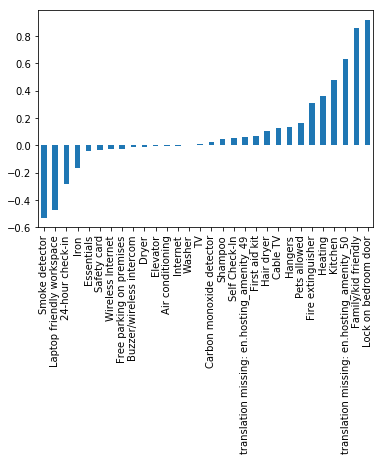

In [164]:
pd.Series(data=[n[0] for n in amenity_effects],
          index=[n[1] for n in amenity_effects])\
            .sort_values()\
            .plot(kind='bar')

In [30]:
# Standardizing the fields - Mean standardization
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)## Transform ur data with means and stds of train

In [31]:
x_train_std.shape, x_test_std.shape

((74111, 120), (25458, 120))

# Train~Val Split

In [38]:
from sklearn.model_selection import train_test_split
seed = 1
x_train_1 , x_val_1, y_train_1, y_val_1 = train_test_split(x_train_std, y_train, test_size = 0.3, random_state=seed)

# Model Building 

# 1. Random Forest

In [172]:
print('Shape of x_train_std', x_train_std.shape)
print('Shape of x_test_std', x_test_std.shape)
print('Shape of y_train', y_train.shape)
print('Shape of x_train_1', x_train_1.shape)
print('Shape of y_train_1', y_train_1.shape)
print('Shape of x_val_1', x_val_1.shape)
print('Shape of y_val_1', y_val_1.shape)

Shape of x_train_std (74111, 120)
Shape of x_test_std (25458, 120)
Shape of y_train (74111,)
Shape of x_train_1 (51877, 120)
Shape of y_train_1 (51877,)
Shape of x_val_1 (22234, 120)
Shape of y_val_1 (22234,)


In [34]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

/usr/lib64/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [173]:
cv_groups = KFold(n_splits=3)
regr = RandomForestRegressor(random_state = 0, n_estimators = 120)

for train_index, test_index in cv_groups.split(x_train_std):
    
    # Train the model using the training sets
    regr.fit(x_train_std[train_index], y_train[train_index])
    
    # Make predictions using the testing set
    pred_rf = regr.predict(x_train_std[test_index])
    
    # Calculate RMSE for current cross-validation split
    rmse = str(np.sqrt(np.mean((y_train[test_index] - pred_rf)**2)))
    
    print("RMSE for current split: " + rmse)

RMSE for current split: 0.420005727538
RMSE for current split: 0.419240435286
RMSE for current split: 0.427919750682


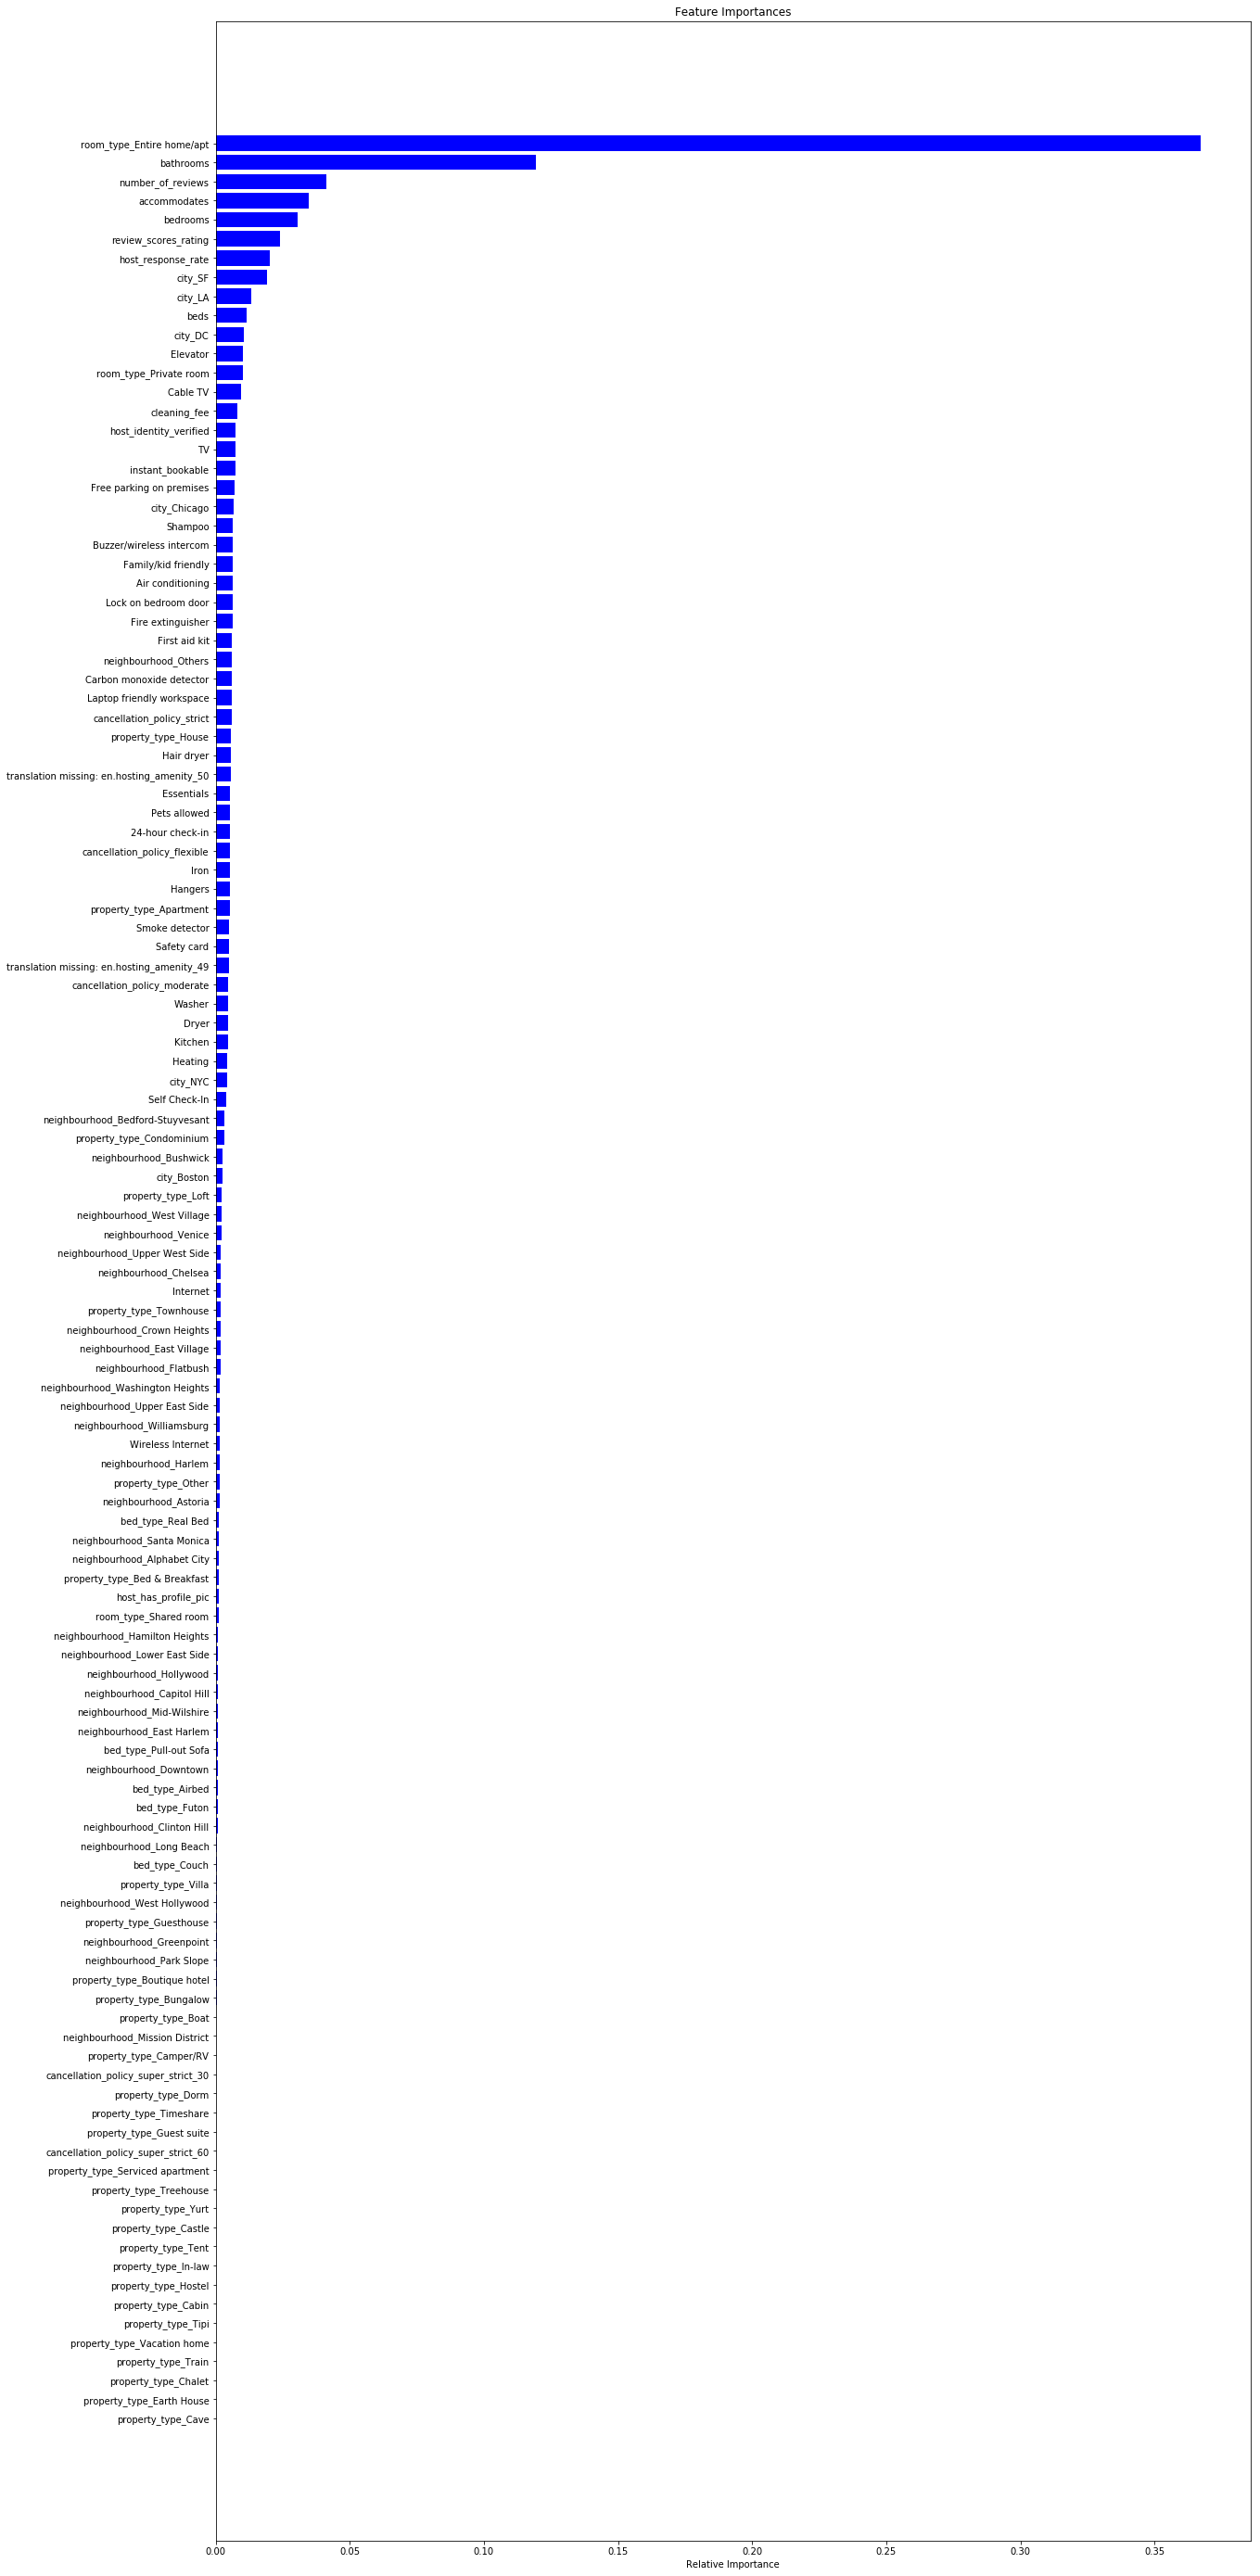

In [174]:
# Plotting the features 
import matplotlib.pyplot as plt
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [175]:
# Predicting on test data
test_log_price_rf = regr.predict(x_test_std)

In [176]:
# Tuning Random Forest model
regr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)>

In [177]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 19, stop = 59, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [178]:
print(random_grid)

{'n_estimators': [19, 29, 39, 49, 59], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [179]:
rf_tune = RandomForestRegressor()
rf_random_tune = RandomizedSearchCV(estimator=rf_tune, param_distributions=random_grid, n_iter=5, cv=3, verbose=2,
                                    random_state=42, n_jobs= -1)

In [180]:
rf_random_tune.fit(x_train_1, y_train_1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [19, 29, 39, 49, 59], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [181]:
rf_random_tune.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 19}

In [182]:
# Evaluate function for the predictor 
def evaluate(model, test_features, test_score):
    predictions = model.predict(test_features)
    rmse = str(np.sqrt(np.mean((test_score - predictions)**2)))
    print('rmse', rmse)
    return rmse

In [183]:
best_rf = rf_random_tune

In [184]:
rf_rmse_train = evaluate(best_rf, x_train_1, y_train_1)

rmse 0.265111263601


In [185]:
rf_rmse_val = evaluate(best_rf, x_val_1, y_val_1)

rmse 0.431661279605


In [186]:
rf_RandomizedSearchCV_predict_test = best_rf.predict(x_test_std)

In [187]:
rf_RandomizedSearchCV_predict_test.shape

(25458,)

In [188]:
pred_test_rf_Random = pd.DataFrame(rf_RandomizedSearchCV_predict_test)
pred_test_rf_Random.columns = ["log_price"]
pred_test_rf_Random.head(3)

log_price
0   4.560116
1   5.088081
2   4.482499

In [189]:
test_submission_rf_Random = pd.concat((test_id, pred_test_rf_Random), axis=1)

In [191]:
test_submission_rf_Random.to_csv('Test_Submission_RF_RandomCV.csv')

In [35]:
# Grid Search with CV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [20,30,40,50],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators': [30, 40, 50, 100, 200]
}

In [36]:
rf_grid = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [39]:
grid_search.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_f

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20, total=   4.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_fea

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=6, max_depth=20, total=   4.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   1.2s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_featur

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   0.7s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_fe

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.7s


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_feat

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=5

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=20, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=20, total=   2.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=20, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=20, total=   0.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_fe

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=20, total=   4.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_featu

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20, total=   1.1s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20, total=   4.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20, total=   2.2s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_featur

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min


[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   5.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   6.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_feat

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=20, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20, total=   6.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=20, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=20

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   0.9s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.0s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_featu

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   5.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   5.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_f

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   3.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   2.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   2.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   2.8s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   3.0s
[CV] bootstrap=True, min_samples_leaf=4

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=20, total=   5.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=20, total=   5.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.1s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_fea

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   1.4s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   4.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_featur

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=30, total=   5.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30 


[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=30, total=   4.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   2.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, 

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   5.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   5.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30, total=   3.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, ma

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   4.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_fea

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30, total=   0.8s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30, total=   4.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30, total=   4.5s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_es

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   1.9s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   1.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30, total=   3.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30, total=   3.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, ma

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_featur

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30, total=   1.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   6.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=20

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.7min


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=30, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=30, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=30, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_featu

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30, total=   5.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30, total=   5.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=30, total=   2.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=30, total=   3.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, m

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=30, total=   5.3s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_fe

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30, total=   6.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   2.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   2.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3,

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   4.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, ma

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=40, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=40, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=10, max_depth=30, total=   5.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=40, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=40, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_feat

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=10, max_depth=40, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   5.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=10, max_depth=40, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   5.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, 

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40, total=   5.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   2.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   2.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, 

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=40, total=   4.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=40, total=   5.0s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_fea

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   1.3s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   5.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=20

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   0.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   0.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_featur

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.3min


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=40, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=40, total=   2.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=40, total=   2.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_fe

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   4.1s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   4.3s
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, m

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40, total=   1.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=40, total=   2.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=40, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40, total=   5.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_featu

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40, total=   1.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=40, total=   5.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40, total=   1.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=40, total=   3.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=40, total=   3.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_feat

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40, total=   6.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=40, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40, total=   6.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_fe

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40, total=   1.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40, total=   1.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_featu

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40, total=   5.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=40, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=40, total=   2.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=50, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_feat

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=50, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50, total=   5.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50, total=   4.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=50, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_f

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=50, total=   2.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=50, total=   2.4s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=50, total=   2.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=50, total=   2.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, ma

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50, total=   4.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_feat

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50, total=   4.7s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50, total=   4.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=50, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=50, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.5min


[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50, total=   0.7s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=50, total=   0.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, ma

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=4, max_depth=50, total=   0.8s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50, total=   4.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50, total=   4.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50, total=   1.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50, total=   1.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50, total=   1.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50, total=   2.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, ma

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   3.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   4.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, m

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=50, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=50, total=   1.6s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=50, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=50, total=   1.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=50, max_f

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50, total=   1.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50, total=   0.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=8, max_depth=50, total=   1.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=40, max_featur

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=10, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=10, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50, total=   5.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50, total=   5.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=100,

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50, total=   2.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50, total=   2.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50, total=   2.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=50, total=   2.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=30, max_

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   5.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   5.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=40, max_fea

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=50, total=   1.4s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50, total=   5.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50, total=   5.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50, total=   0.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=40, max_featu

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   4.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   5.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   4.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50, total=   2.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50, total=   2.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=3

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20, total=   6.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20, total=   6.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20, total=   6.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=20, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20, total=   3.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=4, max_depth=20, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=20, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, m

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=6, max_depth=20, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20, total=   5.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=20, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=1

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20, total=   3.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20, total=   2.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=20, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=20, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimato

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 15.3min


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=20, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20, total=   5.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20, total=   5.7s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20, total=   6.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimat

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=20, total=   5.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=20, total=   1.6s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=20, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=20, total=   2.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimato

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=20, total=   0.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=20, total=   1.4s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=20, total=   5.3s
[CV] bootstrap=False, min_samples_leaf=4, n_

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=20, total=   6.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=10, max_depth=20, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=20, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=20, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=20, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=4, max_depth=20, total=   4.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=3

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   7.6s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40,

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=20, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=10, max_depth=20, total=   2.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20, total=   8.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   3.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=2, n_es

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=6, max_depth=20, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, 

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=8, max_depth=20, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   7.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   3.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   4.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=10, max_depth=20, total=   3.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimator

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=20, total=   7.3s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=6, max_depth=20, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=20, total=   7.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=8, max_depth=20, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=20, total=   3.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimator

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=4, max_depth=30, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=10, max_depth=20, total=   6.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=6, max_depth=30, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=30, total=   7.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   3.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   3.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimat

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.7s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=4, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   7.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimator

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=6, max_depth=30, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   3.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimat

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.4s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=4, max_depth=30, total=   1.5s
[CV] bootstrap=False, min_samples_leaf

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   2.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=6, max_depth=30, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=3

[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 20.5min


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   2.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   3.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   3.0s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=30, total=   2.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimat

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   6.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=30, total=   5.4s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   2.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   2.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=30, total=   2.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimat

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=30, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=30, total=  10.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   2.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   3.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   4.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   4.3s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=30, total=   4.5s
[CV] bootstrap=False, min_samples_leaf

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   8.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   8.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   8.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimat

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   2.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=30, total=   7.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   2.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   2.2s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=30, total=   2.1s
[CV] bootstrap=False, min_samples_leaf=4

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=30, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=8, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, 

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   8.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=30, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=10, max_depth=30, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=30, total=   9.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=4, n_estim

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   3.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   3.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=40, total=   4.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimator

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200,

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40, total=   6.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=40, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_est

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   1.0s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=40, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_e

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=40, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=40, total=   6.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=5

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40, total=   3.0s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40, total=   3.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40, total=   3.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40, total=   3.5s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=40, total=   3.3s
[CV] bootstrap=False, min_sampl

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=40, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40, total=   6.3s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=4, max_depth=40, total=   6.3s
[CV] bootstrap=False, min_samples_leaf=4, n

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40, total=   1.5s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, m

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40, total=   2.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100,

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40, total=   4.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40, total=   5.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=40, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimato

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40, total=   8.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50,

[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 27.1min


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40, total=   2.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40, total=   2.2s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=40, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_fea

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=10, max_depth=40, total=   8.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=4, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=5

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=40, total=   7.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40, total=   3.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=6, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=40, total=   3.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=8, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimato

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=40, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=8, max_depth=40, total=   7.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=10, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimat

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50, total=   2.0s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=4, max_depth=50, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=6, max_depth=50, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30,

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   7.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=2, min_samples_split=10, max_depth=50, total=   1.4s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   8.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estima

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50, total=   7.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50, total=   3.1s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50, total=   3.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50, total=   3.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimat

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=2, min_samples_split=8, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50, total=   5.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40,

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   6.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50, total=   1.9s
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=50, total=   6.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_esti

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=4, max_depth=50, total=   3.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=2, min_samples_split=6, max_depth=50, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30,

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50, total=   6.1s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=2, min_samples_split=8, max_depth=50, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=6, max_depth=50, total=   6.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=5

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=2, min_samples_split=10, max_depth=50, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50, total=   3.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50, total=   3.0s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50, total=   3.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=2, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=10, max_depth=50, total=   3.0s
[CV] bootstrap=False, min_samp

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=30, max_features=3, min_samples_split=6, max_depth=50, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50, total=   1.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=40

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=  10.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50, total=   2.2s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50, total=   2.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=50, max_features=3, min_samples_split=8, max_depth=50, total=   2.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=100, max_features=3, min_samples_split=10, max_depth=50, total=   4.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50, total=   1.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50, total=   1.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=40,

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=40, max_features=3, min_samples_split=6, max_depth=50, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=100

[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=6, max_depth=50, total=   8.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50, total=   3.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=8, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50, total=   4.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimato

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=4, max_depth=50, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50, total=   1.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=40, max_features=3, min_samples_split=4, max_depth=50, total=   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=50, m

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50, total=   2.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, max_features=3, min_samples_split=4, max_depth=50, total=   8.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=6, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=50, max_features=3, min_samples_split=6, max_depth=50, total=   2.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=50, total=   4.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=30, max_features=3, min_samples_split=10, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimato

[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 33.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [30, 40, 50, 100, 200], 'min_samples_split': [4, 6, 8, 10], 'max_features': [2, 3], 'max_depth': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [41]:
best_grid = grid_search.best_estimator_

In [44]:
grid_train_rmse = evaluate(best_grid, x_train_1, y_train_1)

('rmse', '0.38300748296625475')


In [45]:
grid_val_rmse = evaluate(best_grid, x_val_1, y_val_1)

('rmse', '0.45777989571839084')


In [47]:
# From the above experiment, it's seen that best_rf yields a better rmse value; hence predicting test data by best_rf
pred_test_grid = best_grid.predict(x_test_std)

In [48]:
pred_test_grid = pd.DataFrame(pred_test_grid)
pred_test_grid.columns = ["log_price"]
pred_test_grid.head(3)

log_price
0   4.489334
1   4.945348
2   4.575687

In [49]:
test_submission_rf_grid = pd.concat((test_id, pred_test_grid), axis=1)

In [50]:
test_submission_rf_grid.shape

(25458, 2)

In [52]:
test_submission_rf_grid.to_csv("test_submission_rf_grid.csv")

# 2. Linear Regression

In [53]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

In [54]:
linear.fit(x_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
linear.score(x_train_1, y_train_1)

0.6173053855402194

In [56]:
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

('Coefficient: \n', array([ 2.90519719e+11, -5.02534662e+11, -1.06506348e-02,  6.11054509e+10,
       -2.27355957e-02, -1.20544434e-03, -5.23376465e-03, -7.78198242e-04,
        3.88145447e-03,  2.45237350e-02,  5.35673807e+10, -1.13370419e-02,
       -1.39753819e-02, -7.87224322e+10,  4.21619415e-03, -1.75812244e-02,
        6.92942739e-03, -8.05072949e+10,  1.24113739e-01,  1.91886723e-02,
       -5.46083299e+10, -1.47387311e-02,  3.35510783e-02,  1.76656730e-02,
        2.39240006e-03,  1.69641484e-01, -8.48692682e+10,  7.60600423e+10,
        3.62880700e-02,  1.15083792e+11, -6.03485457e-03,  7.24626589e-03,
       -9.91175275e+10, -1.09672546e-03,  9.88197327e-03, -8.20183308e+11,
        3.31611633e-02,  7.55687563e+10, -2.59124002e+09,  7.90273159e+10,
        6.29650087e+10, -1.79023743e-02, -4.34303284e-03,  5.37879158e+10,
        1.66759491e-02, -3.62777710e-03,  1.78985596e-02, -1.68151855e-02,
       -1.35068893e-02,  5.96618652e-03,  1.52587891e-03,  1.48773193e-03,
     

In [66]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_linear = sqrt(mean_squared_error(y_train_1, linear.predict(x_train_1)))

In [67]:
rmse_linear

0.44398148962293055

In [68]:
rmse_val_linear = sqrt(mean_squared_error(y_val_1, linear.predict(x_val_1)))
rmse_val_linear

0.4458034236226557

In [110]:
### Let's check the dimension and it's importance by using PCA

In [69]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [73]:
pca = PCA(.95)

train_reduced = pca.fit_transform(x_train_1)

In [74]:
train_reduced.shape

(51877, 98)

In [75]:
x_train_1.shape

(51877, 120)

In [76]:
pca.n_components_

98

In [77]:
# Applying Linear Regression to the dimensionaly reduced data 
linear.fit(train_reduced, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
linear.score(train_reduced, y_train_1)

0.5997215584308048

In [79]:
rmse_linear_pca = sqrt(mean_squared_error(y_train_1, linear.predict(train_reduced)))

In [80]:
rmse_linear_pca

0.45406684188811125

In [120]:
### Using Regularization Technique ( Ridge, Lasso and ElasticNet)

In [81]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score 

In [82]:
def rmse_cv(model):
    scores = cross_val_score(model, x_train_1, y_train_1, scoring="neg_mean_squared_error", cv = 5)
    rmse= np.sqrt(-scores)
    return(rmse)

In [83]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [84]:
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

In [85]:
cv_elasticnet = [rmse_cv(ElasticNet(alpha = alpha)).mean() 
            for alpha in alphas]

In [86]:
cv_ridge

[0.445129868772647,
 0.445129745448841,
 0.4451296096549955,
 0.44512907908607674,
 0.4451273673526477,
 0.4451234472356373,
 0.44512052088835563,
 0.4451156268291851,
 0.4451125605361175,
 0.4451075822768333,
 0.4451043586427522,
 0.4451020934851114]

In [87]:
cv_elasticnet

[0.44562972597262557,
 0.46943750572880216,
 0.4923355521442881,
 0.5563653460302499,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508]

In [88]:
cv_lasso

[0.4471779506806398,
 0.4905550131617086,
 0.5253317386571402,
 0.6309520403044904,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508,
 0.7176969511862508]

# 3. xgBoost

In [89]:
import xgboost
from xgboost import XGBRegressor
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [90]:
model_xg = model.fit(x_train_1, y_train_1)

In [91]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [92]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train_xgb = sqrt(mean_squared_error(y_train_1, model_xg.predict(x_train_1)))
rmse_train_xgb

0.40228806534834666

In [93]:
rmse_val_xgb = sqrt(mean_squared_error(y_val_1, model_xg.predict(x_val_1)))
rmse_val_xgb

0.4122133973525961

In [94]:
### Tuning xgBoost
model_xg.get_xgb_params

<bound method XGBRegressor.get_xgb_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)>

In [95]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [96]:
xgb1.fit(x_train_1, y_train_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [97]:
rmse_train_xgb1 = sqrt(mean_squared_error(y_train_1, xgb1.predict(x_train_1)))
rmse_train_xgb1

0.3392781376266131

In [98]:
rmse_val_xgb1 = sqrt(mean_squared_error(y_val_1, xgb1.predict(x_val_1)))
rmse_val_xgb1

0.4045330148518758

In [99]:
# From the above experiment, it's seen that best_rf yields a better rmse value; hence predicting test data by best_rf
pred_test_xgb = xgb1.predict(x_test_std)

In [100]:
pred_test_xgb = pd.DataFrame(pred_test_xgb)
pred_test_xgb.columns = ["log_price"]
pred_test_xgb.head(3)

log_price
0   4.509712
1   5.120961
2   4.586273

In [101]:
test_submission_xgb = pd.concat((test_id, pred_test_xgb), axis=1)

In [102]:
test_submission_xgb.shape

(25458, 2)

In [104]:
test_submission_xgb.to_csv('test_submission_xgb_tuned.csv')

In [105]:
### Tune the parameters 
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV 

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [106]:
param_grid_xg = {
    'booster' : ['gbtree', 'gblinear'],
    'colsample_bytree' : [i/10.0 for i in range(6,10)],
    'gamma' : [i/10 for i in range(0,3)],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2,4,6,8,10],
    'min_child_weight': [1,3,5],
    'subsample':[i/10.0 for i in range(6,10)]       
}

In [107]:
gsearch_xgboost_1 = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xg, cv=5, n_jobs=-1, verbose=2)

In [108]:
gsearch_xgboost_1.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.5s


[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.9s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min


[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  12.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  21.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.1s
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  16.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  23.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.7s
[CV]

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  25.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  26.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.5s
[CV]

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.0s
[CV]

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.0min


[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.7s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  20.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  20.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  18.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  23.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  24.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  22.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   4.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   4.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   4.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   4.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtr

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 18.8min


[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  15.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  17.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gb

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  18.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  18.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  col

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.6s
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 


[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 28.3min


[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  12.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.2s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.9s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  17.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  17.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  co

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  24.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  21.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  16.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  16.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 42.7min


[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  24.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  23.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  21.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  20.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  20.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   5.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  17.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  17.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  18.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  20.1s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, boos

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  20.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  17.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  19.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV] cols

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   4.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   5.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.8s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  12.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  15.8s
[CV] colsamp

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 57.2min


[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  21.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  20.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  20.7s
[CV] colsamp

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  co

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  23.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  23.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  22.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   4.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   4.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   8.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  12.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  14.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  18.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  20.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  19.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 


[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  24.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -   9.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  12.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 75.8min


[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  11.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  20.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  19.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, boos

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  17.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  18.6s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  18.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.7s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  18.0s
[CV]  colsam

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.4s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.6s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  32.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  33.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  30.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  33.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  27.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  24.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  24.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   8.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  18.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  18.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  24.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  20.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  26.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV] 

[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 99.9min


[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  14.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.2s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbt

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  18.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  16.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbt

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  20.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  21.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV]  colsam

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.5s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  18.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.5s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.4s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.0s
[CV] colsamp

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  32.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  32.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  29.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  29.3s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.7s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  10.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.1s
[CV]

[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 124.7min


[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  13.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  14.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  23.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  21.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 


[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  24.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  11.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  13.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  16.6s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.0s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  20.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gb

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  22.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  23.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  21.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.8s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  15.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  15.8s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  14.5s
[CV

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  16.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  18.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.0s
[CV] colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.9s
[CV] colsam

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  31.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  28.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  29.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  31.4s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV]

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.8s
[CV]

[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 153.7min


[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  11.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  16.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  22.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  22.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  24.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  25.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  25.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  26.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  12.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -   9.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  14.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  21.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  20.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  21.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  21.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, boos

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  21.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  21.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  21.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  12.7s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.0s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  29.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.5s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  33.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  31.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  33.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  32.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  36.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  36.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  37.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  34.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 


[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 186.7min


[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.8s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  17.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  28.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  27.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  30.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  30.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  30.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  29.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  31.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  26.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  22.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, boos

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  25.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  26.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  25.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  12.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.1s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  16.8s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.6s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  30.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  36.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  33.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  32.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  34.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  35.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.9s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]

[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 226.2min


[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  31.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  30.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  30.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  30.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  27.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbt

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  12.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtr

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  25.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  25.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  25.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  25.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  24.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtre

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   5.7s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  10.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  11.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.0s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  17.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  20.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.1s
[CV] colsamp

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  23.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  26.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  24.8s
[CV] colsamp

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  29.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  35.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  36.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  35.0s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  30.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  30.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  30.3s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV]

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   5.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  13.6s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  10.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  18.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.4s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  17.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  17.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  20.6s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  25.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  21.8s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  25.8s
[CV]

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  26.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  29.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  29

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 


[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 267.4min


[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  20.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  19.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  15.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.3s
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.6s
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  22.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  24.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  23.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtr

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  24.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  25.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  23.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, boos

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.7s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.3s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  18.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  16.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  30.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  28.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  31.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  29.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  30.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  32.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  34.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  33.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  33.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  32.5s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  36.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  35.5s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  36.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  33.3s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.4s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.4s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.2s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.7s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  18.2s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  30.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.7s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  24.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  29.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.8s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  31.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  30.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  30.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  32

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  32.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  33.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  33.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  32

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   6

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  26.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  26.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  28.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  27.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  29.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  29.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, boos

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.2s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[Parallel(n_jobs=-1)]: Done 9097 tasks      | elapsed: 315.9min


[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.1s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  22.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  31.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  31.5s
[CV] colsamp

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  24.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_by

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  34.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  37.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  36.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  36.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  26.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  34.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  34.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  33.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  31.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  32.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  31.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  15.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  24.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  18.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  25.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  25.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  26.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  26.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtr

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  28.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  29.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  29.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gb

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   7.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.1s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  14.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.3s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  20.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  17.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  17.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  22.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.3s
[CV] colsamp

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  27.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  23.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  24.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  26.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsam

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  31.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  29.0s
[CV] colsamp

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  32.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  33.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  38.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  40.3s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  34.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  32.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  33.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  34.0s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   8.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.3s
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   7.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.8s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  16.2s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  13.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree -  12.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.2s
[CV]

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  23.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree -  21.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  21.6s
[CV]

[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed: 369.6min


[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  18.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  18.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  28.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  28.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  30.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  25.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  30.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  33.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  29.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  32.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  31.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  31.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  33.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  31.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  32.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbtree -   6.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbtree -   7.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbtree -   8.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbtree -   7.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbtr

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  13.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbtree -  16.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbtree -  14.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbtree 
[CV] 

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  11.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbtree -  12.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  19.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbtree -  22.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbtree -  20.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbtree -  18.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  27.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  28.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbtree -  26.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbtree -  27.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbtree -  26.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  24.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  24.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbtree -  26.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gbtr

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  26.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbtree -  27.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  29.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbtree -  28.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, boos

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  27.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtree -  28.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gbtree 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbtr

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbtree -  29.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, b

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, boost

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0

[Parallel(n_jobs=-1)]: Done 11689 tasks      | elapsed: 397.5min


[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, ga

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   4

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbline

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, g

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.1s
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gb

[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gbline

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinea

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booste

[Parallel(n_jobs=-1)]: Done 13106 tasks      | elapsed: 408.5min


[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster

[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0

[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamm

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.6, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10,

[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.6, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, bo

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbline

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   4.2s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gbline

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinea

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbline

[Parallel(n_jobs=-1)]: Done 14605 tasks      | elapsed: 420.3min


[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, boost

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gbli

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10,

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10,

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.2s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, bo

[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.1s
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10,

[Parallel(n_jobs=-1)]: Done 16184 tasks      | elapsed: 432.6min


[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.7, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10,

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.1s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   4

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, boost

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, bo

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, boost

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   4.2s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0

[Parallel(n_jobs=-1)]: Done 17845 tasks      | elapsed: 445.7min


[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblin

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=

[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbli

[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0

[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10,

[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.8, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10,

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0

[Parallel(n_jobs=-1)]: Done 19586 tasks      | elapsed: 459.4min


[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] 

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV] 

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblin

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   4.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gbline

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinea

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=g

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   4.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=6, gamma=

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10,

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, bo

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.3s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblin

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gbline

[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=3, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.1, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=2, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   4.2s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=4, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=6, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   4.3s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=6, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=8, gamma=0, booste

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=8, gamma=0, booster=gbline

[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=1, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=3, subsample=0.6, max_depth=10, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.8, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.01, min_child_weight=5, subsample=0.7, max_depth=10, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=2, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=2, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=2, gamma=0, booster=gblinear -   4.0s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=2, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=2, gamma=0

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.4s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.9, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.3s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=4, gamma=0

[Parallel(n_jobs=-1)]: Done 21409 tasks      | elapsed: 473.7min


[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.7, max_depth=4, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=4, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=4, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=6, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.6, max_depth=6, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=6, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=6, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.8, max_depth=6, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.9s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=6, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=8, gamma=0

[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.6s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.7, max_depth=8, gamma=0, booster=gblinear -   3.5s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=8, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=8, gamma=0, booste

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.9, max_depth=8, gamma=0, booster=gblinear -   4.1s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.8s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.5s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.6, max_depth=10, gamma=0, booster=gblinear -   3.7s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.7, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=1, subsample=0.8, max_depth=10, 

[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.9, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.0s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   3.9s
[CV]  colsample_bytree=0.9, learning_rate=0.001, min_child_weight=3, subsample=0.8, max_depth=10, gamma=0, booster=gblinear -   4.4s
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10, gamma=0, booster=gblinear 
[CV] colsample_bytree=0.9, learning_rate=0.001, min_child_weight=5, subsample=0.6, max_depth=10,

[Parallel(n_jobs=-1)]: Done 21600 out of 21600 | elapsed: 475.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01, 0.001], 'min_child_weight': [1, 3, 5], 'subsample': [0.6, 0.7, 0.8, 0.9], 'max_depth': [2, 4, 6, 8, 10], 'gamma': [0, 0, 0], 'booster': ['gbtree', 'gblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [109]:
gsearch_xgboost_1.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.8}

In [110]:
best_grid_xgb = gsearch_xgboost_1.best_estimator_

In [111]:
# Evaluate function for the predictor 
def evaluate(model, test_features, test_score):
    predictions = model.predict(test_features)
    rmse = str(np.sqrt(np.mean((test_score - predictions)**2)))
    print('rmse', rmse)
    return rmse

In [112]:
grid_rmse_train = evaluate(best_grid_xgb, x_train_1, y_train_1)

('rmse', '0.3372158250729064')


In [113]:
grid_rmse_val = evaluate(best_grid_xgb, x_val_1, y_val_1)

('rmse', '0.4084483213369344')


In [114]:
pred_test_xgb = pd.DataFrame(best_grid_xgb.predict(x_test_std))

In [115]:
test_submission_xgb_grid = pd.concat((test_id, pred_test_xgb), axis=1)

In [116]:
test_submission_xgb_grid.shape

(25458, 2)

In [117]:
test_submission_xgb.to_csv("Test_Submission_xgb_grid.csv")

# 4. Artificial Neural network (ANN)

In [118]:
print('x_train_1 shape: {}'.format(x_train_1.shape))
print('y_train_1 shape: {}'.format(y_train_1.shape))
print('x_val_1 shape:  {}'.format(x_val_1.shape))
print('y_val_1 shape:  {}'.format(y_val_1.shape))
print('x_test_std shape: {}'.format(x_test_std.shape))

x_train_1 shape: (51877, 120)
y_train_1 shape: (51877,)
x_val_1 shape:  (22234, 120)
y_val_1 shape:  (22234,)
x_test_std shape: (25458, 120)


In [119]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [120]:
# Building a simple MLP
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(100, kernel_initializer='uniform', input_dim = 120, activation='relu')) # Add a dense layer 
model.add(Dense(1, kernel_initializer='uniform', activation='linear')) # Add output layer

In [121]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss='mean_squared_error', # CrossEntropy is the loss function. 
              optimizer=adam,                  # Mention the optimizer
              metrics=['mean_squared_error'])  

In [122]:
nb_epochs = 50
history = model.fit(x_train_1, y_train_1, epochs = nb_epochs, batch_size=64,validation_data=(x_val_1, y_val_1))

Train on 51877 samples, validate on 22234 samples
Epoch 1/50
51877/51877 [==============================] - 2s - loss: 1.6708 - mean_squared_error: 1.6708 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 2/50
51877/51877 [==============================] - 2s - loss: 0.2043 - mean_squared_error: 0.2043 - val_loss: 0.1987 - val_mean_squared_error: 0.1987
Epoch 3/50
51877/51877 [==============================] - 1s - loss: 0.1912 - mean_squared_error: 0.1912 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 4/50
51877/51877 [==============================] - 1s - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 0.1995 - val_mean_squared_error: 0.1995
Epoch 5/50
51877/51877 [==============================] - 1s - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 6/50
51877/51877 [==============================] - 2s - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.1891 - val_mean_squared_error: 0.1891
Epoch 7/

In [123]:
history.history

{'loss': [1.6707716526616834,
  0.204313686044894,
  0.19123069594005995,
  0.18455257870725533,
  0.18090212674961242,
  0.17766664709334942,
  0.17516231149780306,
  0.17319878318419762,
  0.17097346657033963,
  0.16944108077908365,
  0.1688826495625821,
  0.16740280421927947,
  0.16564312160964723,
  0.16471229097255224,
  0.16397412100269945,
  0.1631559099175732,
  0.16227797446292944,
  0.16242632616615715,
  0.16075114357420797,
  0.1604786172954703,
  0.1605318380049715,
  0.1591666457665776,
  0.1594467307903842,
  0.15874434679874164,
  0.15809813087161,
  0.1586479438540229,
  0.15711642590582614,
  0.1564251496282873,
  0.15704833369110457,
  0.15619373666164027,
  0.1555815679014268,
  0.15520614637945396,
  0.15523360723815116,
  0.15459023384833678,
  0.15476279956279426,
  0.15490970041434887,
  0.1543950482717211,
  0.1542789663555127,
  0.1536727136093518,
  0.15255805851752433,
  0.15359594198239485,
  0.15253107869170332,
  0.1531638985043638,
  0.15259353321795405,

In [124]:
train_mse = history.history['mean_squared_error']
train_loss = history.history['loss']

val_mse = history.history['val_mean_squared_error']
val_loss = history.history['val_loss']

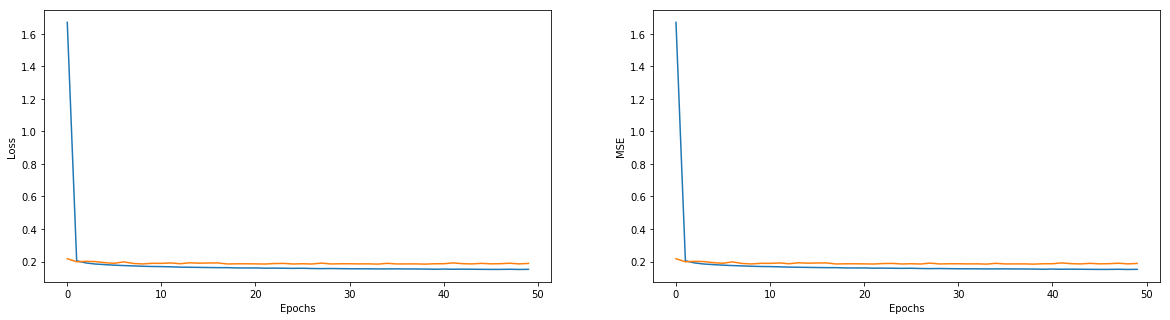

In [125]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(train_mse)
plt.plot(val_mse)

In [126]:
test_predict_ann = pd.DataFrame(model.predict(x_test_std))

In [127]:
test_predict_ann.columns = ['log_price']

In [128]:
test_predict_ann.shape

(25458, 1)

In [129]:
test_submission_ann_revized_1 = pd.concat((test_id, test_predict_ann),axis=1)
test_submission_ann_revized_1.to_csv('Test_submission_ann_base.csv')

In [130]:
x_test_std.shape

(25458, 120)

### Optimizing ANN

In [131]:
#i. Optimizing learning rate 
lr_list = [0.001, 0.01, 0.1]
history_lr = [] 

%time
for l in lr_list:
    print('================================================================================================================================')
    print('                                                    Learning rate: {0}'.format(l))
    print('================================================================================================================================')
    model2 = Sequential()
    model2.add(Dense(100, kernel_initializer='uniform', input_dim = 120, activation='relu')) # Add a dense layer 
    model2.add(Dense(1, kernel_initializer='uniform', activation='linear')) # Add output layer
       
    adam = Adam(lr=l)
    model2.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])
    
    history_2 = model2.fit(x_train_1, y_train_1, epochs = 10, batch_size=64,validation_data=(x_val_1, y_val_1))
    history_lr.append(history_2)
%time

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 10 µs
                                                    Learning rate: 0.001
Train on 51877 samples, validate on 22234 samples
Epoch 1/10
51877/51877 [==============================] - 1s - loss: 1.7016 - mean_squared_error: 1.7016 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 2/10
51877/51877 [==============================] - 1s - loss: 0.2088 - mean_squared_error: 0.2088 - val_loss: 0.2033 - val_mean_squared_error: 0.2033
Epoch 3/10
51877/51877 [==============================] - 1s - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.1972 - val_mean_squared_error: 0.1972
Epoch 4/10
51877/51877 [==============================] - 1s - loss: 0.1858 - mean_squared_error: 0.1858 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 5/10
51877/51877 [==============================] - 1s - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 0.2012 - val_mean_squared_error: 0.2012
Epoch 6/10
51877/51877 [=

In [ ]:
### From all the models above, Random forest with RandomizedSearchCV and xgBoost with 
#   hyper-parameter tuning using grid search are giving better rmse(low rmse) value hence chosing them as the final model.